In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

In [ ]:
from zipfile import ZipFile

data_path = '/content/drive/MyDrive/cats and dog.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


In [ ]:
path ='cats and dog'
classes = os.listdir()
classes

['.config', 'training_set', 'drive', 'test_set', 'sample_data']

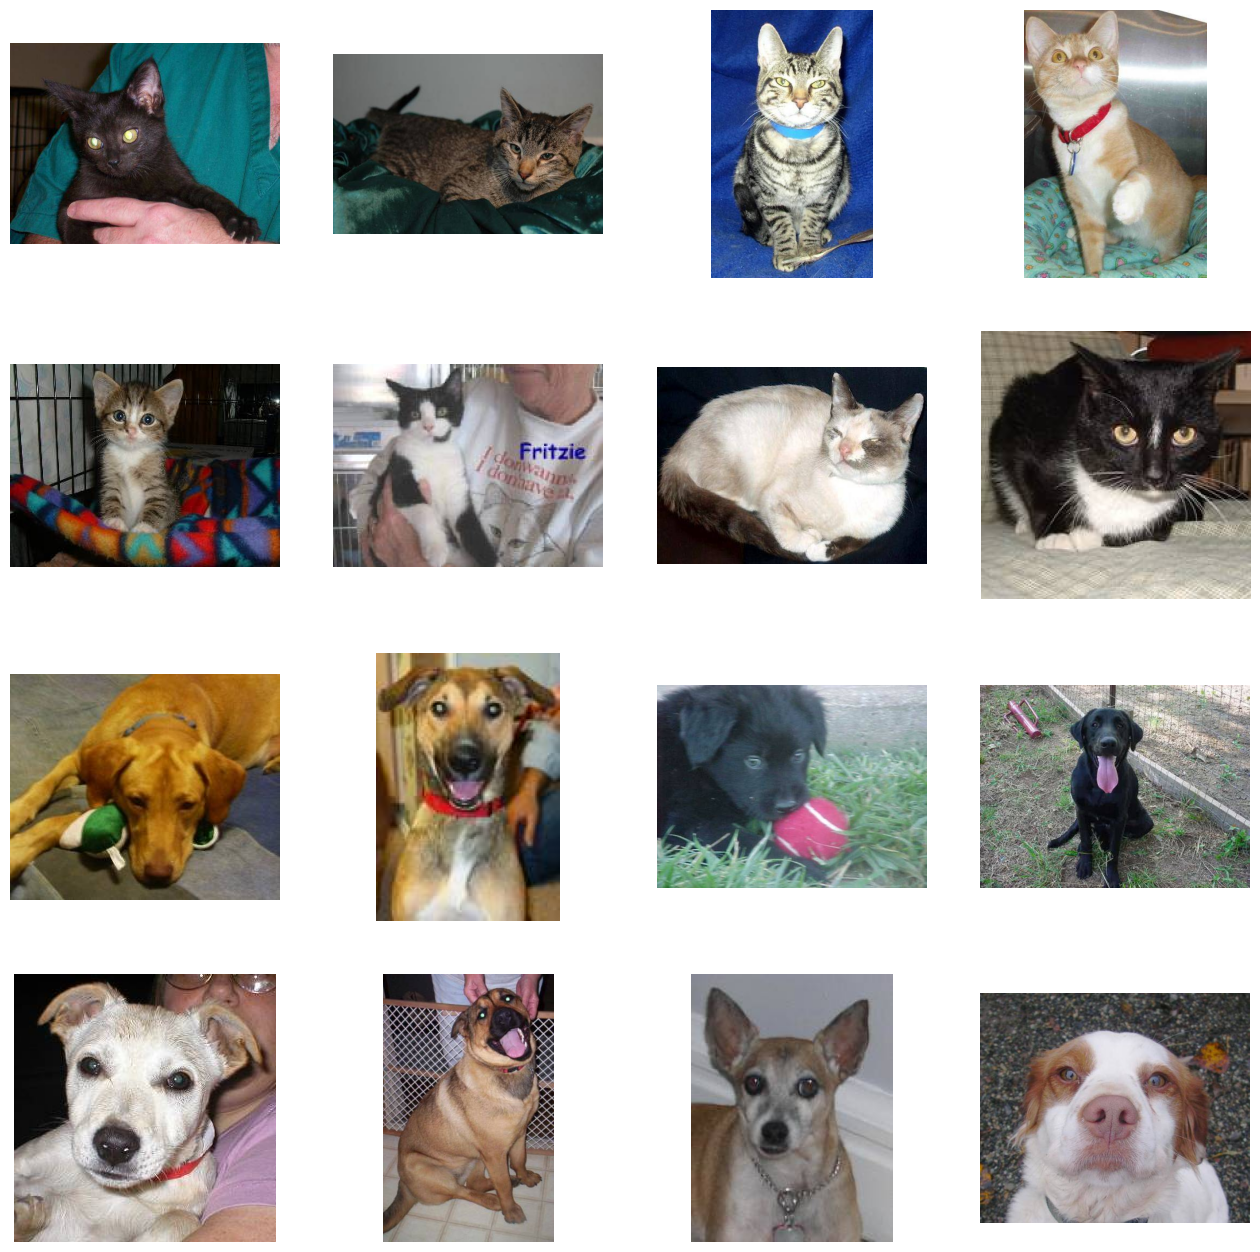

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('/content/test_set/test_set/cats')
dog_dir = os.path.join('/content/test_set/test_set/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()


In [ ]:
base_dir = '/content/training_set/training_set'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)

Found 8005 files belonging to 2 classes.
Using 7205 files for training.
Found 8005 files belonging to 2 classes.
Using 800 files for validation.


In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

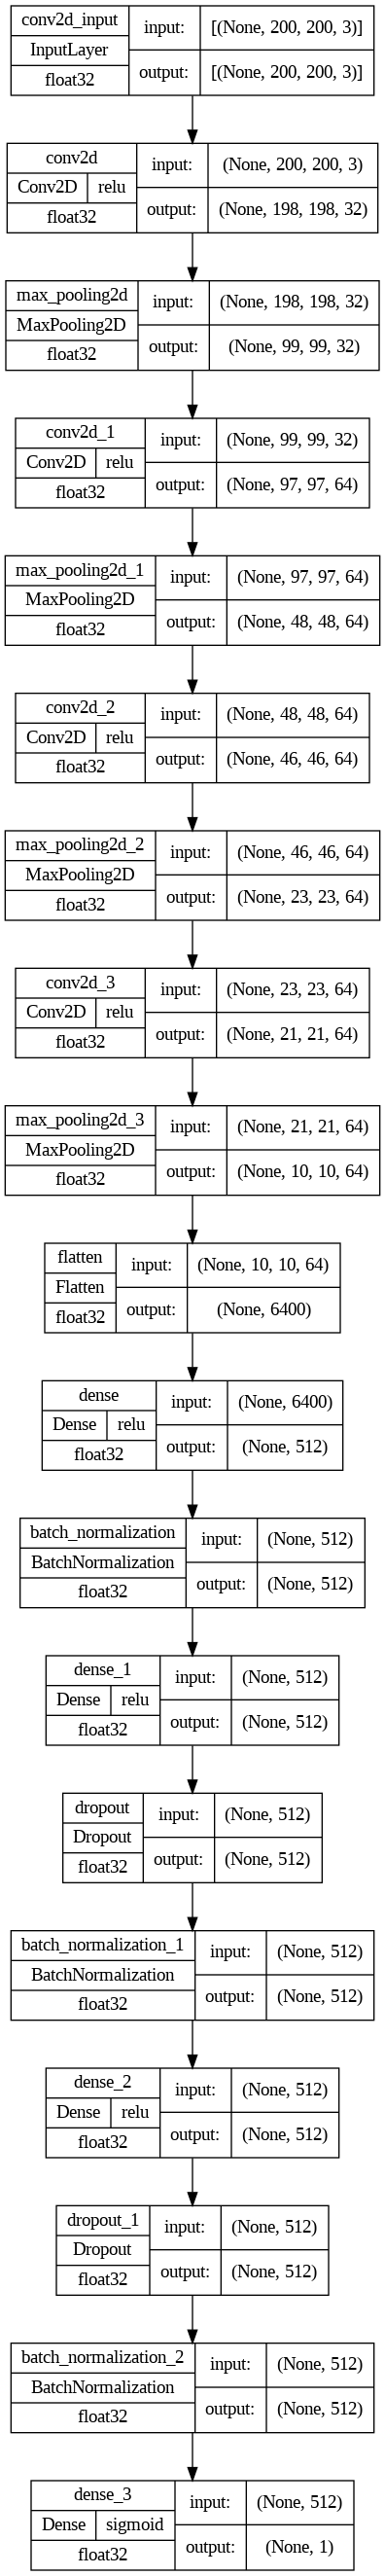

In [ ]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True

 )


In [ ]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)


In [ ]:
history = model.fit(train_datagen,
          epochs=10,
          validation_data=test_datagen)

Epoch 1/10
226/226 [==============================] - 24s 59ms/step - loss: 0.7770 - accuracy: 0.5500 - val_loss: 1.0120 - val_accuracy: 0.4900
Epoch 2/10
226/226 [==============================] - 13s 55ms/step - loss: 0.6951 - accuracy: 0.5854 - val_loss: 0.9058 - val_accuracy: 0.5263
Epoch 3/10
226/226 [==============================] - 13s 55ms/step - loss: 0.6534 - accuracy: 0.6318 - val_loss: 2.5019 - val_accuracy: 0.4950
Epoch 4/10
226/226 [==============================] - 13s 54ms/step - loss: 0.6088 - accuracy: 0.6770 - val_loss: 0.6511 - val_accuracy: 0.6200
Epoch 5/10
226/226 [==============================] - 13s 57ms/step - loss: 0.5538 - accuracy: 0.7226 - val_loss: 0.6733 - val_accuracy: 0.6425
Epoch 6/10
226/226 [==============================] - 13s 56ms/step - loss: 0.4931 - accuracy: 0.7624 - val_loss: 0.9674 - val_accuracy: 0.5525
Epoch 7/10
226/226 [==============================] - 13s 56ms/step - loss: 0.4878 - accuracy: 0.7649 - val_loss: 0.7528 - val_accuracy:

In [ ]:
model.save('dog_vs_cat_classification_model.h5')
print("Model saved successfully")

Model saved successfully


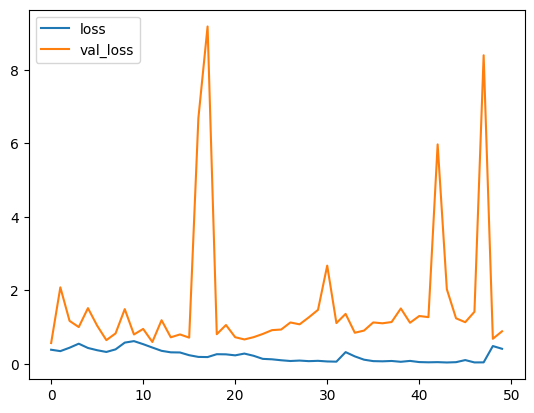

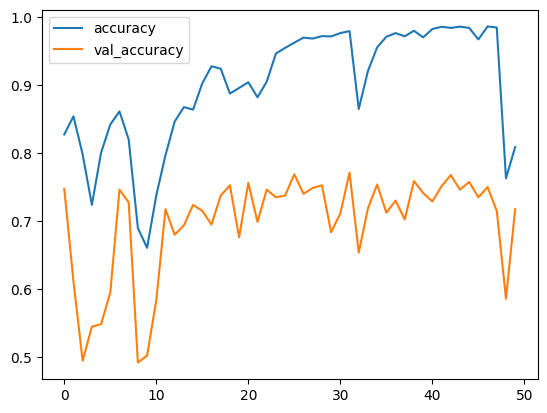

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


1/1 [==============================] - 0s 55ms/step
Dog


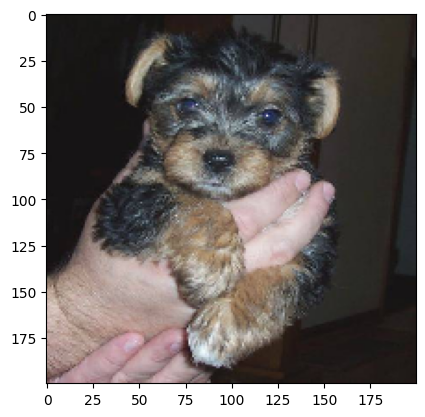

In [ ]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('/content/test_set/test_set/dogs/dog.4002.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")


1/1 [==============================] - 0s 60ms/step
Dog


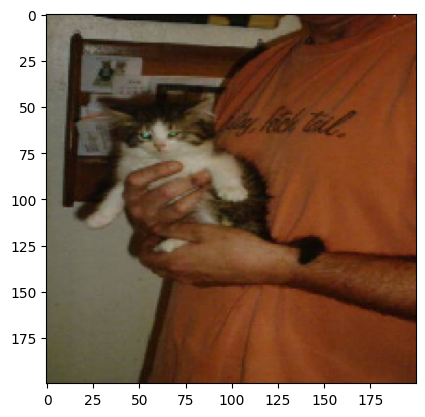

In [ ]:
test_image = image.load_img('/content/test_set/test_set/cats/cat.4002.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
	print("Dog")
else:
	print("Cat")
